<a href="https://colab.research.google.com/github/FerrazThales/Churn_prediction/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* Visite também o meu artigo sobre esta análise no [Medium]()

* Visite mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

* Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?


# *Você vai aprender por aqui*

* O que é **Churn** e como isso pode ser **importante** para o seu negócio.
* Quais os **tipos de dados** são os melhores para serem utilizados neste problema.
* x
* x
* x

# Churn Prediction

Clientes são considerados um dos grandes **ativos** de um negócio. Em um cenário **competitivo**, em que o cliente possui inúmeras opções de escolhas, é necessário tentar fornecer a melhor experiência possível para os seus consumidores.

*Churn rate*, ou simplesmente *churn*, representa a **taxa de evasão** da sua base de clientes. Em serviços como Spotify ou Netflix ela representaria a **taxa de cancelamento** de assinaturas em um determinado período.

<p align=center>
<img src="https://cdn.pixabay.com/photo/2017/10/03/19/17/bad-review-2813741_960_720.png" width="40%"></p>

Esta taxa de cancelamento é de extrema importância para o **gerenciamento** e sua análise ao longo do tempo pode mostrar que existe algum **problema** que deve ser **atacado**. Já que se considera que os custos  para conquistar um **novo** cliente pode ser até 15x maior do que o para reter um cliente **atual**.

Uma análise preditiva de *Churn* ajudará a identificar **potenciais cancelamentos** com um tempo de antecedência. Desta forma, possibilita a empresa a promover ações direcionadas para tentar **reter** os clientes que estão insatisfeitos. Ou até mesmo, avaliar se compensa manter estes clientes considerando as **receitas** que eles proporcionam.

## Obtenção dos Dados

Os dados utilizados neste projeto foram **originalmente** disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema **típico** de uma companhia de **telecomunicações**. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

É importante ressalar que estes tipos de dados são extremamente utilizados para elaborar uma **estratégia de negócios**, portanto não são fáceis de se obter informações **atualizadas**.


Para um melhor entendimento de nosso banco de dados foi elaborado um **pequeno dicionário** das variáveis:

* *customerID*: identificação única do usuário na empresa.
* *gender*: gênero do usuário.
* *SeniorCitizen*: Se o cliente é idoso ou não.
* *Partner*: Se o cliente possui acompanhante ou não.
* *Dependents*: Se o cliente possui dependentes.
* *tenure*:
* *PhoneService*: Se o cliente optou por serviços telefônicos.
* *MultipleLines*:
* *InternetService*: Se o cliente optou por serviços de internet.
* *OnlineSecurity*:
* *OnlineBackup*:
* *DeviceProtection*:
* *TechSupport*:
* *StreamingTV*: Se o cliente optou por serviços de streaming na TV.
* *StreamingMovies*: Se o cliente optou por serviços de streaming para Filmes.
* *Contract*: Tipo de contrato do cliente (mensal, anual ou de dois anos).
* *PaperlessBilling*:
* *PaymentMethod*: Forma de pagamento (cheque eletrônico - [sim, existiu](https://www1.folha.uol.com.br/fsp/1996/1/31/dinheiro/12.html); um cheque por e-mail - [sim,existiu](https://forum.wordreference.com/threads/a-mailed-check-must-clear-the-bank.866139/) ; transferência bancária e cartão de crédito.
* *MonthlyCharges*:
* *TotalCharges*:
* *Churn*: Se o cliente abandonou a empresa.

In [6]:
# importar os módulos necessários
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# importar os dados
endereco_dos_dados = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(endereco_dos_dados)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise Exploratória dos Dados

In [8]:
#Avaliando o tamanho do dataset
print('Este dataset contém:')
print('{:,} entradas'.format(df.shape[0]).replace(',','.'))
print('{} variáveis'.format(df.shape[1]))

Este dataset contém:
7.043 entradas
21 variáveis


In [9]:
#Tipo de variáveis de nossa base de dados
pd.DataFrame(df.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Existem muitas variáveis do tipo *object* que precisam ser **convertidas** por variáveis **númericas** para melhorar a **perfomance** de nossos algoritmos.

In [10]:
#Avaliando a quantidade de valores ausentes
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de valores ausentes'])

,Quantidade de valores ausentes
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Verificamos que as variávies ternure e MonthlyCharges possuem desviões padrões muito acentuados em relação a média

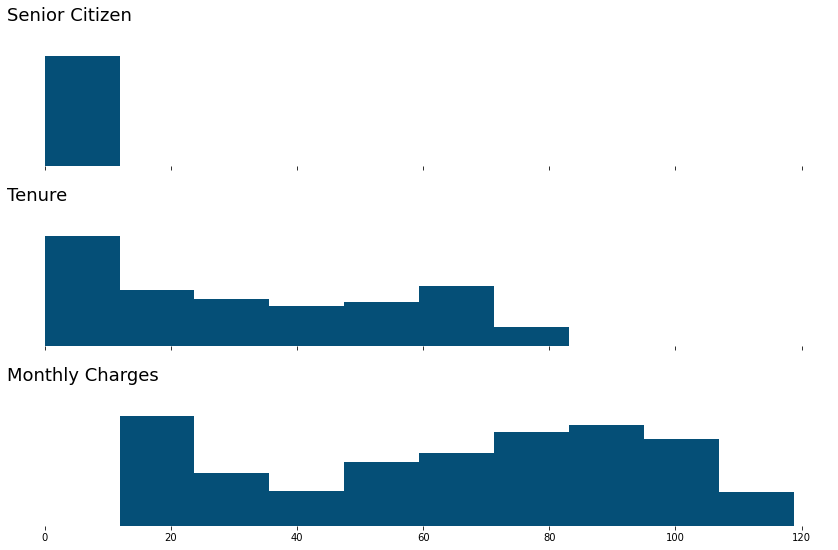

In [237]:
#Histograma das variáveis
ax = df.plot(kind='hist',subplots=True,figsize=(12,8),legend=False,color='#054F77')

#primeiro gráfico
ax[0].set_frame_on(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Senior Citizen',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'})

#segundo gráfico
ax[1].set_frame_on(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Tenure',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'})

#terceiro gráfico
ax[2].set_frame_on(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title('Monthly Charges',loc='left',pad=30,fontdict={'fontsize':18,'Family':'Dejavu Sans'})


plt.tight_layout(pad=2.0)

## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*